# Instructions (Remove the instructions before submission)

This assignment will deal with tuning the hyperparameters for the [online shopping dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset). Make sure to remove the instructions and only keep Q6 onward. The qmd file of this assignment is located in the [files folder](https://georgetown.instructure.com/files/11681026/download?download_frd=1).

- This is a group assignment with independent submission on Canvas. Collaboration is essential. Use Git for version control.
- Begin by setting your random seed as the last four digits of your GUID.
- Prefix each variable with 'g#groupnumber' (e.g., g01_variableName) to ensure uniqueness and to demonstrate originality in your group's work.
- add the names of all group members to the YAML header above.
- Use of Generative AI tools, including but not restricted to GPT-3 is strictly prohibited.

## Git Commit and Collaboration

- This is a group assignment. Collaboration is essential. Use Git for version control.
- Regular and meaningful commit messages are expected, indicating steady progress and contributions from all group members.
- Avoid large, infrequent commits. Instead, aim for more minor, frequent updates showing your code's evolution and thoughts.
- Collaboration tools, especially Git, should be used as a backup tool and a truly collaborative platform. Discuss, review, and merge each other's contributions.

# Grading Criteria

- The assignment is worth 75 points.
- There are three grading milestones in the assignment.
  - Adherence to Requirements, Coding Standards, Documentation, Runtime, and Efficiency (22 Points)
    - Adherence to Requirements (5 Points): Ensure all the given requirements of the assignment, including Git commits and collaboration, are met.
    - Coding Standards (5 Points): Code should be readable and maintainable. Ensure appropriate variable naming and code commenting.
    - Documentation (6 Points): Provide explanations or reasoning for using a particular command and describe the outputs. Avoid vague descriptions; aim for clarity and depth.
    - Runtime (3 Points): The code should execute without errors and handle possible exceptions.
    - Efficiency (3 Points): Implement efficient coding practices, avoid redundancy, and optimize for performance where applicable.
  - Collaborative Programming (13 Points)
    - GitHub Repository Structure (3 Points): A well-organized repository with clear directory structures and meaningful file names.
    - Number of Commits (3 Points): Reflects steady progress and contributions from all group members.
    - Commit Quality (3 Points): Clear, descriptive commit messages representing logical chunks of work. Avoid trivial commits like "typo fix."
    - Collaboration & Contribution (4 Points): Demonstrated teamwork where each member contributes significantly. This can be seen through pull requests, code reviews, and merge activities.
  - Assignment Questions (40 Points)

# Adherence to Requirements, Coding Standards, Documentation, Runtime, and Efficiency (22 Points)
This section is graded based on adherence to Requirements, Coding Standards,
Documentation, Runtime, and Efficiency.

# Collaborative Programming (13 Points)

This section is graded based on the Github submission. Each person needs to have made commits to the repository. GitHub Repository Structure, Number of Commits, Commit Quality, Collaboration, and Contribution are generally graded based on the group's overall performance. However, if there is a significant difference in the number of commits or contributions between group members, the instructor may adjust the grade accordingly.


# Assignment Questions (40 Points)

# Data Preparation (7 Points):

## Import the necessary libraries

In [10]:
import random
random.seed(1310) # last 4 GUID digits
from seaborn.palettes import color_palette
from seaborn import set_palette
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

## Load the dataset and display the dataframe (2 Points).


In [2]:
filename = '../HW2/creditcard.csv'
CC = pd.read_csv(filename)

CC.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


## Use `describe` to provide statistics on the pandas Dataframe (2 Points).


In [3]:
# Add code here
CC.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Convert To Correct Dtypes and Clean DataFrame


In [4]:
# Class is categorical variables but is encoded as integer
CC['Class'] = CC['Class'].astype('category')

# Drop NA's if any

CC.dropna(inplace=True)

## Split the dataset into a Training set and a Test set. Justify your preferred split (3 Points).


In [5]:
X_train, X_test, y_train, y_test = train_test_split(CC.iloc[:,0:-2],
                                        CC.iloc[:,-1],
                                        test_size=0.33,
                                        random_state=42)

# Reset and drop indexes after splitting, convert to numpy arrays and flatten
X_train.reset_index(inplace=True)
X_train = X_train.to_numpy()
y_train = y_train.reset_index().drop("index", axis=1).astype('category')
y_train = y_train.to_numpy().reshape(len(y_train),)

X_test.reset_index(inplace=True)
X_test = X_test.to_numpy()
y_test = y_test.reset_index().drop("index", axis=1).astype('category')
y_test = y_test.to_numpy().reshape(len(y_test),)

# Classification Routine (12 Points)

Execute a classification routine using RandomForestClassifier(), BaggingClassifier(), and XGboostclassifier(). Independently output the accuracy box plot as discussed in class. Use any package you are comfortable with (seaborn, matplotlib).

## RandomForestClassifier()


In [6]:
RF = RandomForestClassifier()

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

RF_accuracy = cross_val_score(RF, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

RF_weighted_f1 = cross_val_score(RF, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

mean_accuracy_percentage = RF_accuracy.mean() * 100
mean_weighted_f1_percentage = RF_weighted_f1.mean() * 100

print('Random Forest Mean Accuracy: %.3f, Mean Weighted F1: %.3f' % (mean_accuracy_percentage, mean_weighted_f1_percentage))

Random Forest Mean Accuracy: 99.949 Mean Weighted F1: 99.944


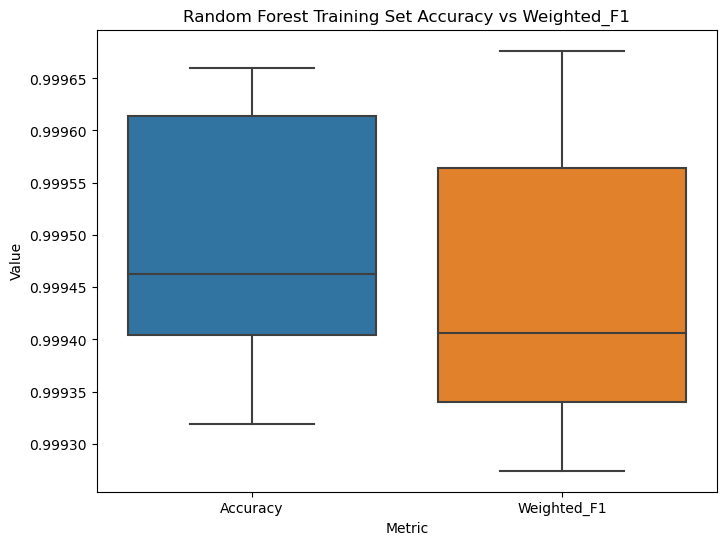

<Figure size 640x480 with 0 Axes>

In [7]:
results = {}
results['Accuracy'] = RF_accuracy
results['Weighted_F1'] = RF_weighted_f1

RF_mod = pd.DataFrame(results)

# Melt the DataFrame to have 'Metric' as a new column indicating Accuracy or Weighted_F1
RF_mod_melted = pd.melt(RF_mod, value_vars=['Accuracy', 'Weighted_F1'], var_name='Metric', value_name='Value')

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Value', data=RF_mod_melted)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Random Forest Training Set Accuracy vs Weighted_F1')
plt.show()
plt.savefig('RF.jpeg')

In [8]:
RF.fit(X_train, y_train)

# Save to file in the current working directory
pkl_filename = "RF.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(RF, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Random Forest Test Set Accuracy: {0:.2f} %".format(100 * score))
  Y_predict = pickle_model.predict(X_test)

Test Set Accuracy: 99.96 %


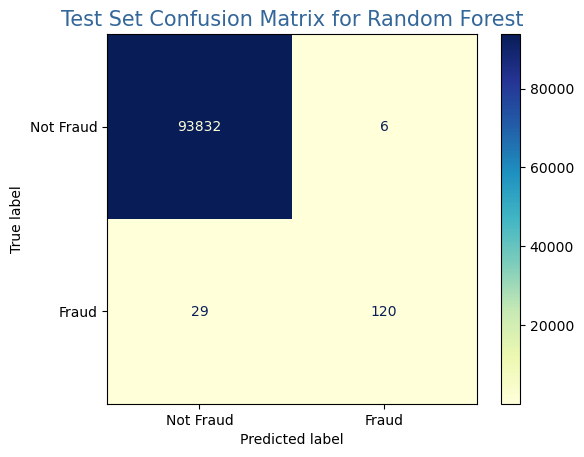

In [11]:
conf_matrix = confusion_matrix(y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Random Forest', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_RF.png')

## BaggingClassifier()


In [ ]:
Bagging = BaggingClassifier()

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

Bagging_accuracy = cross_val_score(Bagging, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

Bagging_weighted_f1 = cross_val_score(Bagging, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

mean_accuracy_percentage = Bagging_accuracy.mean() * 100
mean_weighted_f1_percentage = Bagging_weighted_f1.mean() * 100

print('Bagging Mean Accuracy: %.3f, Mean Weighted F1: %.3f' % (mean_accuracy_percentage, mean_weighted_f1_percentage))

In [ ]:
results = {}
results['Accuracy'] = Bagging_accuracy
results['Weighted_F1'] = Bagging_weighted_f1

Bagging_mod = pd.DataFrame(results)

# Melt the DataFrame to have 'Metric' as a new column indicating Accuracy or Weighted_F1
Bagging_mod_melted = pd.melt(Bagging_mod, value_vars=['Accuracy', 'Weighted_F1'], var_name='Metric', value_name='Value')

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Value', data=Bagging_mod_melted)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Bagging Training Set Accuracy vs Weighted_F1')
plt.show()
plt.savefig('Bagging.jpeg')

In [ ]:
Bagging.fit(X_train, y_train)

# Save to file in the current working directory
pkl_filename = "Bagging.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(Bagging, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Bagging Test Set Accuracy: {0:.2f} %".format(100 * score))
  Y_predict = pickle_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Bagging', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_Bagging.png')

## XGboostclassifier()


In [ ]:
XGB = XGBClassifier()

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

XGB_accuracy = cross_val_score(XGB, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

XGB_weighted_f1 = cross_val_score(XGB, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

mean_accuracy_percentage = XGB_accuracy.mean() * 100
mean_weighted_f1_percentage = XGB_weighted_f1.mean() * 100

print('XGBoost Mean Accuracy: %.3f Mean Weighted F1: %.3f' % (mean_accuracy_percentage, mean_weighted_f1_percentage))

In [ ]:
results = {}
results['Accuracy'] = XGB_accuracy
results['Weighted_F1'] = XGB_weighted_f1

XGB_mod = pd.DataFrame(results)

# Melt the DataFrame to have 'Metric' as a new column indicating Accuracy or Weighted_F1
XGB_mod_melted = pd.melt(XGB_mod, value_vars=['Accuracy', 'Weighted_F1'], var_name='Metric', value_name='Value')

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Value', data=XGB_mod_melted)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('XGBoost Training Set Accuracy vs Weighted_F1')
plt.show()
plt.savefig('XGB.jpeg')

In [ ]:
XGB.fit(X_train, y_train)

# Save to file in the current working directory
pkl_filename = "XGB.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(XGB, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("XGBoost Test Set Accuracy: {0:.2f} %".format(100 * score))
  Y_predict = pickle_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for XGBoost', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_XGB.png')

# Classification with GridSearchCV (8 Points)

## RandomForestClassifier()


In [ ]:
# defining parameter range
param_grid = params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = -1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "RF_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned Random Forest Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned Random Forest', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_RF_Grid_Tuned.png')

## BaggingClassifier()


In [ ]:
# defining parameter range
param_grid = params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
  
grid = GridSearchCV(BaggingClassifier(), param_grid, refit = True, verbose = -1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "Bagging_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned Bagging Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned Bagging', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_Bagging_Grid_Tuned.png')

## XGBClassifier()


In [ ]:
# defining parameter range
param_grid = params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
  
grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = -1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "XGB_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned XGBoost Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned XGBoost', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_XGB_Grid_Tuned.png')

# Classification with RandomSearchCV (8 Points)

## RandomForestClassifier()


In [ ]:
# defining parameter range
param_grid = params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = -1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "RF_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned Random Forest Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned Random Forest', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_RF_Grid_Tuned.png')

## BaggingClassifier()


In [ ]:
# defining parameter range
param_grid = params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
  
grid = GridSearchCV(BaggingClassifier(), param_grid, refit = True, verbose = -1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "Bagging_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned Bagging Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned Bagging', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_Bagging_Grid_Tuned.png')

## XGBClassifier()


In [ ]:
# defining parameter range
param_grid = params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
  
grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = -1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "XGB_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned XGBoost Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned XGBoost', fontsize=15, color='#336699',loc='center')
plt.savefig('confusion_matrix_XGB_Grid_Tuned.png')

# Comparison and Analysis (5 Points)

Compare the results from Q2, Q3, and Q4. Describe the best hyperparameters for all three experiments.